In [16]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")


In [17]:

def map_features(x, degree):
    x_old = x.copy()
    x = pd.DataFrame({"intercept" : [1]*x.shape[0]})
    column_index = 1
    for i in range(1, degree+1):
        for j in range(0, i+1):
            x.insert(column_index, str(x_old.columns[1]) + "^" + str(i-j) + str(x_old.columns[2]) + "^" + str(j), np.multiply(x_old.iloc[:,1]**(i-j), x_old.iloc[:,2]**(j)))
            column_index+=1
    return x

def normalize_features(x):
    global mean_values
    global std_values
    for column_name in x.columns[1:]:
        mean = x[column_name].mean()
        std = x[column_name].std()
        x[column_name] = (x[column_name] - mean) / std
        mean_values[column_name] = mean
        std_values[column_name] = std
    return x

def sigmoid(z):
    return 1/(1+np.exp(-z))

def cost(x, y, theta):
    m = x.shape[0]
    h_theta = pd.DataFrame(sigmoid(np.dot(x,theta)))
    cost = 1/m * ((-np.multiply(y,h_theta.apply(np.log)) - np.multiply(1-y, (1-h_theta).apply(np.log))).sum())
    return np.asscalar(cost)

def gradient_descent(x, y, theta):
    global cost_values
    m = x.shape[0]
    iterations = 1000
    alpha = 0.03
    cost_values = pd.DataFrame({'iteration' : [0], 'cost' : [cost(x,y,theta)]})

    for iteration in range(0,iterations):
        theta_old = theta.copy()
        theta.iloc[0,0] = theta.iloc[0,0] - (alpha/m) * np.asscalar((sigmoid(np.dot(x,theta_old)) - y).sum())
        for i in range(1,theta.shape[0]):
            theta.iloc[i,0] = theta.iloc[i,0] - (alpha/m) * np.asscalar(np.multiply((sigmoid(np.dot(x,theta_old)) - y), pd.DataFrame(x.iloc[:,i])).sum())
        c = cost(x,y,theta)
        cost_values = cost_values.append({"iteration" : iteration, "cost" : c}, ignore_index=True)

def predict(x):
    global theta
    probability = np.asscalar(sigmoid(np.dot(x.T,theta)))
    return probability
    if(probability >= 0.5):
        return 1
    else:
        return 0



In [18]:
### Read train data
train_data = pd.read_csv("ex2data1.csv", names = ["exam1", "exam2", "admit"])


In [19]:
### Create input data
x = train_data.loc[:,"exam1":"exam2"]
### Add intercept column
x.insert(0, "intercept", 1)
mean_values = {}
std_values = {}
mapping_degree = 2
x = normalize_features(x) #normalize features
x0 = x
x = map_features(x, mapping_degree) #map polynomial features
x1 = x
y = pd.DataFrame(train_data.loc[:,"admit"])
theta = pd.DataFrame({"theta" : [0] * len(x.columns)})
x0

,intercept,exam1,exam2
0,1,-1.594216,0.635141
1,1,-1.817101,-1.201489
2,1,-1.531325,0.359483
3,1,-0.280687,1.080923
4,1,0.688062,0.490905
...,...,...,...
95,1,0.917087,-0.960121
96,1,-1.201681,1.123720
97,1,1.730412,0.137407
98,1,-0.529558,-0.069422


In [20]:
### Test cost of initial theta
# print(cost(x,y,theta))

### Perform Gradient Descent
gradient_descent(x, y, theta)
# print(theta)
# print("Cost: " + str(cost(x,y,theta)))



<ipython-input-17-1c759ca1bcc4>:29: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return np.asscalar(cost)
<ipython-input-17-1c759ca1bcc4>:40: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  theta.iloc[0,0] = theta.iloc[0,0] - (alpha/m) * np.asscalar((sigmoid(np.dot(x,theta_old)) - y).sum())
<ipython-input-17-1c759ca1bcc4>:42: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  theta.iloc[i,0] = theta.iloc[i,0] - (alpha/m) * np.asscalar(np.multiply((sigmoid(np.dot(x,theta_old)) - y), pd.DataFrame(x.iloc[:,i])).sum())


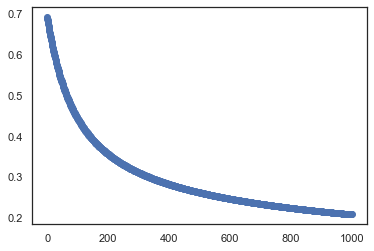

In [21]:
### Plot iteration vs Cost
plt.scatter(cost_values["iteration"], cost_values["cost"])
plt.show()


In [22]:
### Predict an example
student = pd.DataFrame({"exam1": [52], "exam2":[63]})
student.insert(0, "intercept", 1)
#normalizing
for column_name in student.columns[1:]:
    student[column_name] = (student[column_name] - mean_values[column_name]) / std_values[column_name]
student = map_features(student, mapping_degree)
print("probability of admission: " + str(predict(student.T)))

student

probability of admission: 0.32666925862295454


<ipython-input-17-1c759ca1bcc4>:48: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  probability = np.asscalar(sigmoid(np.dot(x.T,theta)))


,intercept,exam1^1exam2^0,exam1^0exam2^1,exam1^2exam2^0,exam1^1exam2^1,exam1^0exam2^2
0,1,-0.701209,-0.173386,0.491694,0.12158,0.030063


In [23]:
### Calculate Accuracy
acc = 0
for i in range(0,x.shape[0]):
    p = predict(pd.DataFrame(x.iloc[i,:]))
    actual = y.iloc[i,0]
    if(p >= 0.5):
        p = 1
    else:
        p = 0
    if(p == actual):
        acc+=1
print("Accuracy : " + str((acc/x.shape[0]) * 100))



Accuracy : 96.0


<ipython-input-17-1c759ca1bcc4>:48: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  probability = np.asscalar(sigmoid(np.dot(x.T,theta)))


<ipython-input-17-1c759ca1bcc4>:48: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  probability = np.asscalar(sigmoid(np.dot(x.T,theta)))


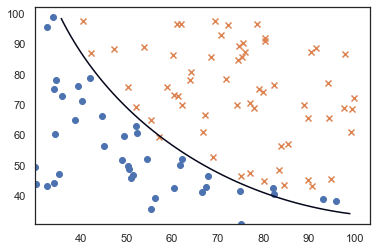

In [24]:
### Plot decision boundary
x_min = train_data["exam1"].min()
x_max = train_data["exam1"].max()
y_min = train_data["exam2"].min()
y_max = train_data["exam2"].max()
x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))
xx = pd.DataFrame(x_grid.ravel(), columns=["exam1"])
yy = pd.DataFrame(y_grid.ravel(), columns=["exam2"])
z = pd.DataFrame({"intercept" : [1]*xx.shape[0]})
z["exam1"] = xx
z["exam2"] = yy
z = normalize_features(z)
z = map_features(z,mapping_degree)
p = z.apply(lambda row: predict(pd.DataFrame(row)), axis=1)
p = np.array(p.values)
p = p.reshape(x_grid.shape)
plt.scatter(train_data[train_data["admit"] == 0]["exam1"], train_data[train_data["admit"] == 0]["exam2"],marker="o")
plt.scatter(train_data[train_data["admit"] == 1]["exam1"], train_data[train_data["admit"] == 1]["exam2"],marker="x")
plt.contour(x_grid, y_grid, p, levels = [0.5]) #displays only decision boundary
# plt.contour(x_grid, y_grid, p, 50, cmap="RdBu") #display a colored contour
# plt.colorbar()
plt.show()
# p

In [25]:
p

array([[4.86710229e-04, 5.82874911e-04, 6.96456306e-04, ...,
        3.71997963e-01, 3.78891018e-01, 3.85299397e-01],
       [5.60361983e-04, 6.71017091e-04, 8.01698349e-04, ...,
        4.04232193e-01, 4.11312552e-01, 4.17881480e-01],
       [6.44324950e-04, 7.71487723e-04, 9.21646302e-04, ...,
        4.36998731e-01, 4.44205937e-01, 4.50878630e-01],
       ...,
       [2.54398035e-01, 2.89048722e-01, 3.25857959e-01, ...,
        9.96616945e-01, 9.96697829e-01, 9.96769537e-01],
       [2.65219181e-01, 3.00732953e-01, 3.38304706e-01, ...,
        9.96784876e-01, 9.96861516e-01, 9.96929443e-01],
       [2.76073436e-01, 3.12405994e-01, 3.50687040e-01, ...,
        9.96940585e-01, 9.97013293e-01, 9.97077719e-01]])